<span style = "color :#ff00ff; font-size:35px; font-family: 'Times New Roman', Times, serif;">Exploratory data analysis of the lost journalists</span>

# Introduction
<span style = "color:blue; font-size:20px;" >please read this text for information about dataset</span> </br>
<a href = "https://www.kaggle.com/yamqwe/journalist-deathse">link</a> 

# Importing Libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../input/journalist-deathse/cpj-database.csv")

In [3]:
data.head()

,index,Date,Name,Sex,Country Killed,Organization,Nationality,Medium,Job,Coverage,...,Tortured,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,0,1/1/92,Kladoumbaye Maxime,Male,Chad,Agence Tchadienne de Presse,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1/3/92,Ram Singh Biling,Male,India,"Azdi Awaz, Daily Ajit",India,Print,Print Reporter,"Corruption, Human Rights, Politics",...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1/15/92,Mustafa Jeha,Male,Lebanon,Al-Amal,Lebanon,Print,Columnist,Politics,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1/17/92,Paul Jenks,Male,Croatia,European Pressphoto Agency,United Kingdom,Print,Photographer,War,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2/9/92,Halit Gungen,Male,Turkey,2000'e Dogru,Turkey,Print,Editor,"Corruption, Human Rights, Politics",...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning 

## will drop the empty columns 

In [4]:
data = data.drop(['index','Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25'], axis = 1)

In [5]:
data.columns

Index(['Date', 'Name', 'Sex', 'Country Killed', 'Organization', 'Nationality',
       'Medium', 'Job', 'Coverage', 'Freelance', 'Local/Foreign',
       'Source of Fire', 'Type of Death', 'Impunity (for Murder)',
       'Taken Captive', 'Threatened', 'Tortured'],
      dtype='object')

# EDA 

In [6]:
data.shape

(1641, 17)

## 1641 rows and 17 columns

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1641 entries, 0 to 1640
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   1641 non-null   object
 1   Name                   1641 non-null   object
 2   Sex                    1176 non-null   object
 3   Country Killed         1640 non-null   object
 4   Organization           1638 non-null   object
 5   Nationality            1405 non-null   object
 6   Medium                 1175 non-null   object
 7   Job                    1168 non-null   object
 8   Coverage               1139 non-null   object
 9   Freelance              1175 non-null   object
 10  Local/Foreign          1175 non-null   object
 11  Source of Fire         1175 non-null   object
 12  Type of Death          1175 non-null   object
 13  Impunity (for Murder)  758 non-null    object
 14  Taken Captive          1057 non-null   object
 15  Threatened           

## all the feature variables anre categorical

In [8]:
data.nunique()

Date                     1323
Name                     1637
Sex                         4
Country Killed            105
Organization             1114
Nationality               169
Medium                     18
Job                        72
Coverage                   76
Freelance                   5
Local/Foreign               4
Source of Fire             20
Type of Death               8
Impunity (for Murder)       6
Taken Captive               5
Threatened                  6
Tortured                    4
dtype: int64

## let's check for null values

In [9]:
data.isnull().sum()

Date                       0
Name                       0
Sex                      465
Country Killed             1
Organization               3
Nationality              236
Medium                   466
Job                      473
Coverage                 502
Freelance                466
Local/Foreign            466
Source of Fire           466
Type of Death            466
Impunity (for Murder)    883
Taken Captive            584
Threatened               581
Tortured                 590
dtype: int64

## will rename some coulumns for our convenience

In [10]:
data = data.rename({"Country Killed":"Country_Killed","Local/Foreign":"Local_or_Foreign","Source of Fire":"Source_of_Fire", "Type of Death":"Type_of_Death", "Impunity (for Murder)":"Impunity", "Taken Captive":"Taken_Captive" }, axis = 1)

## fill the null values with No_Data

In [11]:
data = data.fillna("No_Data")

## Now add a new coulmn, Year

In [12]:
def year(row):
    y = row['Date']
    y = y[len(y)-2:]
    return y

data['Year'] = data.apply(lambda row: year(row), axis = 1)

## of which years data we have 

In [13]:
data['Year'].unique()

array(['92', '93', '94', '95', '96', '97', '98', '99', '00', '01', '02',
       '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', 'te', 'wn', '7,', '7)'], dtype=object)

## we hav to clean every coulmn separately

In [14]:
for index, row in data.iterrows():
    if row['Year'] == 'wn':
        data.at[index, 'Year'] = 'Unknown'
    elif row['Year'] == 'te':
        data.at[index, 'Year'] = 'Unknown'
    elif row['Year'] == '7,':
        data.at[index, 'Year'] = 'Unknown'
    elif row['Year'] == '7)':
        data.at[index, 'Year'] = 'Unknown'

In [15]:
data['Year'].unique()
    

array(['92', '93', '94', '95', '96', '97', '98', '99', '00', '01', '02',
       '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', 'Unknown'], dtype=object)

## same process for sex

In [16]:
for index, row in data.iterrows():
    if row['Sex'] == 'na':
        data.at[index, 'Sex'] = "No_Data"
    elif row['Sex'] == 'Sex':
        data.at[index, "Sex"] = "No_Data"

In [17]:
data['Sex'].unique()

array(['Male', 'No_Data', 'Female'], dtype=object)

In [18]:
data.columns

Index(['Date', 'Name', 'Sex', 'Country_Killed', 'Organization', 'Nationality',
       'Medium', 'Job', 'Coverage', 'Freelance', 'Local_or_Foreign',
       'Source_of_Fire', 'Type_of_Death', 'Impunity', 'Taken_Captive',
       'Threatened', 'Tortured', 'Year'],
      dtype='object')

## Now visualize which year have the most number of journalist death

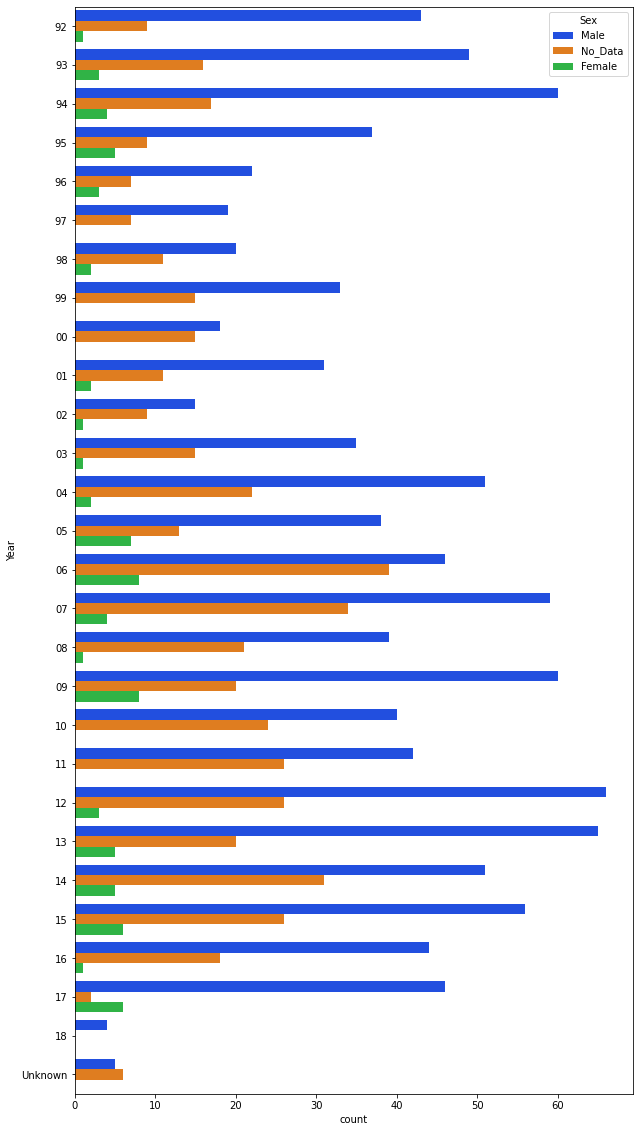

In [19]:
plt.figure(figsize = (10,20))
sns.countplot(y = 'Year', hue = 'Sex',data = data, palette = 'bright')
plt.show()

In [20]:
#top ten countries journalist killed
killed_countries = {}
for number, country in enumerate(data['Country_Killed'].value_counts().index.tolist()):
    killed_countries[country] = data['Country_Killed'].value_counts()[number]

#killed_countries

In [21]:
'''def top_ten(dict):
    val = dict.values()
    new_dict = {}
    for i in sorted(val, reverse = True):
        for keys in dict.keys():
            if dict[keys] == i:
                new_dict[keys] = i
    return new_dict
  
'''
def top(n,dict):
    f = list(dict.items())[:n]
    k = {}
    [k.update({u:v}) for u, v in f]
    return k

## Top ten countries where journalists are killed 

In [22]:
top(10,killed_countries)

{'Iraq': 273,
 'Philippines': 134,
 'Syria': 130,
 'Pakistan': 89,
 'Russia': 82,
 'India': 75,
 'Somalia': 71,
 'Algeria': 57,
 'Afghanistan': 43,
 'Bangladesh': 30}

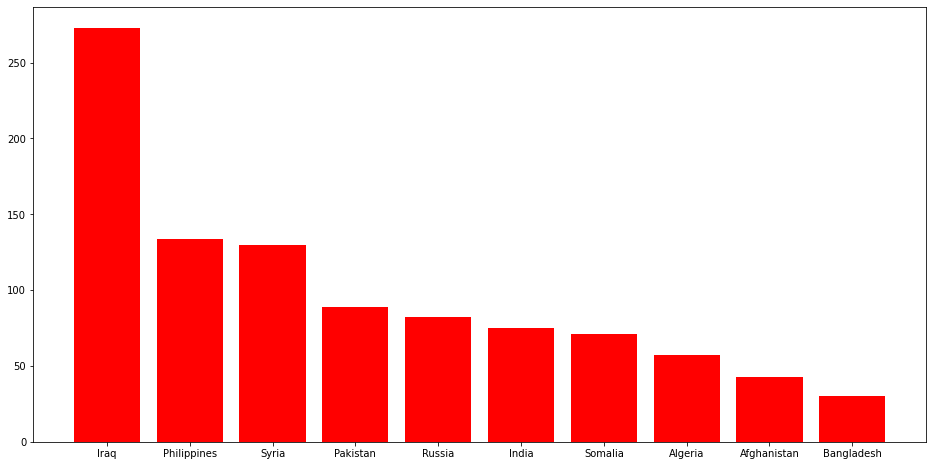

In [23]:
x = list(top(10,killed_countries).keys())
y = list(top(10,killed_countries).values())
plt.figure(figsize=(16,8))
plt.bar(x, y, color = 'red')
plt.show()

In [24]:
killed_nationality = {}
for number, country in enumerate(data['Nationality'].value_counts().index.tolist()):
    killed_nationality[country] = data['Nationality'].value_counts()[number]
#killed_nationality

In [25]:
top(15,killed_nationality)


{'No_Data': 236,
 'Iraq': 169,
 'Syria': 87,
 'Philippines': 74,
 'Pakistan': 72,
 'Russia': 59,
 'Algeria': 55,
 'India': 50,
 'Somalia': 48,
 'Iraqi': 48,
 'Philippine': 35,
 'Syrian': 27,
 'Brazil': 26,
 'Turkey': 24,
 'Bangladesh': 24}

## Top 15 countries whose journalists have been killed

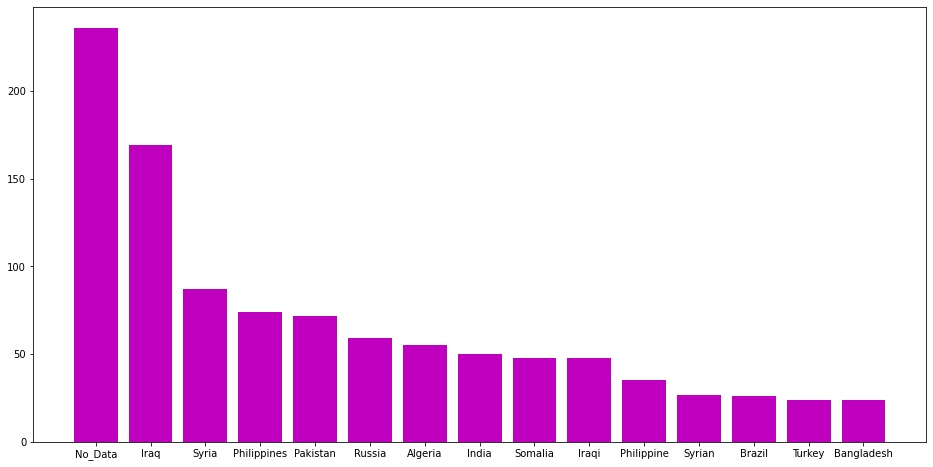

In [26]:
x = list(top(15,killed_nationality).keys())
y = list(top(15,killed_nationality).values())
plt.figure(figsize=(16,8))
plt.bar(x, y, color = 'm')
plt.show()

## are they killed in their own countries or abroad

In [27]:
#killed in own countries
data['Local_or_Foreign'].unique()

array(['No_Data', 'Local', 'Foreign', 'na', 'Local/Foreign'], dtype=object)

In [28]:
for index, row in data.iterrows():
    if row['Local_or_Foreign'] == 'na':
        data.at[index, 'Local_or_Foreign'] = "No_Data"
    elif row['Local_or_Foreign'] == 'Local/Foreign':
        data.at[index, "Local_or_Foreign"] = "No_Data"

In [29]:
data['Local_or_Foreign'].unique()

array(['No_Data', 'Local', 'Foreign'], dtype=object)

In [30]:
local_kill = {}
for kill, region in enumerate(data['Local_or_Foreign'].value_counts().index.tolist()):
    local_kill[region] = data['Local_or_Foreign'].value_counts()[kill]
local_kill

{'Local': 1008, 'No_Data': 482, 'Foreign': 151}

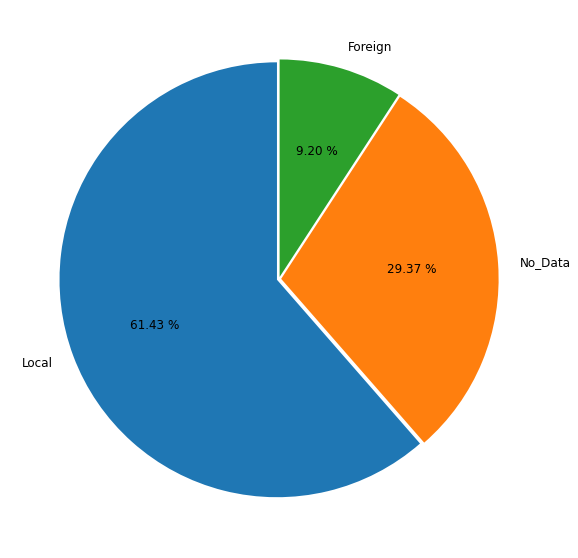

In [31]:
x = list(local_kill.keys())
y = list(local_kill.values())
plt.figure(figsize = (10,10))
plt.pie(y, labels = x, autopct = '%0.2f %%',startangle = 90, explode = (0.01, 0.01, 0.01), textprops = {'fontsize': 12})
plt.show()

### 61%  are killed in their own countries

In [32]:
data['Source_of_Fire'].unique()

array(['No_Data', 'Government Officials', 'Political Group',
       'Military Officials', 'Paramilitary Group', 'Criminal Group',
       'Unknown Fire', 'Mob Violence', 'Local Residents',
       'Government Officials, Paramilitary Group',
       'Government Officials, Military Officials',
       'Criminal Group, Mob Violence',
       'Military Officials, Political Group',
       'Criminal Group, Military Officials',
       'Local Residents, Political Group',
       'Criminal Group, Local Residents', 'na',
       'Criminal Group, Government Officials',
       'Political Group, Paramilitary Group',
       'Criminal Group, Political Group, Government Officials',
       'Source of Fire'], dtype=object)

In [33]:
for index, row in data.iterrows():
    if row['Source_of_Fire'] == 'na':
        data.at[index, 'Source_of_Fire'] = "No_Data"
    elif row['Source_of_Fire'] == 'Source of Fire':
        data.at[index, "Source_of_Fire"] = "No_Data"

data['Source_of_Fire'].unique()

array(['No_Data', 'Government Officials', 'Political Group',
       'Military Officials', 'Paramilitary Group', 'Criminal Group',
       'Unknown Fire', 'Mob Violence', 'Local Residents',
       'Government Officials, Paramilitary Group',
       'Government Officials, Military Officials',
       'Criminal Group, Mob Violence',
       'Military Officials, Political Group',
       'Criminal Group, Military Officials',
       'Local Residents, Political Group',
       'Criminal Group, Local Residents',
       'Criminal Group, Government Officials',
       'Political Group, Paramilitary Group',
       'Criminal Group, Political Group, Government Officials'],
      dtype=object)

In [34]:
Firee = ['No_Data', 'Government Officials', 'Political Group',
       'Military Officials', 'Paramilitary Group', 'Criminal Group',
       'Unknown Fire', 'Mob Violence', 'Local Residents']

In [35]:
S = np.arange(0,9)
def merge(list1, list2):
      
    merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))]
    return merged_list
S = merge(S, Firee)
S

[(0, 'No_Data'),
 (1, 'Government Officials'),
 (2, 'Political Group'),
 (3, 'Military Officials'),
 (4, 'Paramilitary Group'),
 (5, 'Criminal Group'),
 (6, 'Unknown Fire'),
 (7, 'Mob Violence'),
 (8, 'Local Residents')]

In [36]:
V = list(S)

In [37]:
Fire = {}
[Fire.update({u:v}) for u,v in V]

[None, None, None, None, None, None, None, None, None]

In [38]:
Fire

{0: 'No_Data',
 1: 'Government Officials',
 2: 'Political Group',
 3: 'Military Officials',
 4: 'Paramilitary Group',
 5: 'Criminal Group',
 6: 'Unknown Fire',
 7: 'Mob Violence',
 8: 'Local Residents'}

In [39]:
for j in Fire.keys():
    print(Fire[j])

No_Data
Government Officials
Political Group
Military Officials
Paramilitary Group
Criminal Group
Unknown Fire
Mob Violence
Local Residents


In [40]:
ARR = np.zeros((9,9))
for index, row in data.iterrows():
    if len(row['Source_of_Fire'].split(',')) == 1:
        for j in Fire.keys():
            if Fire[j] == row['Source_of_Fire']:
                ARR[j][j] += 1
    elif len(row['Source_of_Fire'].split(',')) == 2:
        for k in Fire.keys():
            for l in Fire.keys():
                if k == l:
                    continue
                elif Fire[k] in row['Source_of_Fire']:
                    if  Fire[l] in row['Source_of_Fire']:
                        ARR[k][l] = ARR[k][l] = ARR[k][l]+ 1

      
              
ARR  
    

array([[482.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0., 165.,   0.,   2.,   1.,   2.,   0.,   0.,   0.],
       [  0.,   0., 406.,   5.,   2.,   0.,   0.,   0.,   1.],
       [  0.,   2.,   5., 219.,   0.,   1.,   0.,   0.,   0.],
       [  0.,   1.,   2.,   0.,  48.,   0.,   0.,   0.,   0.],
       [  0.,   2.,   0.,   1.,   0.,  77.,   0.,   1.,   1.],
       [  0.,   0.,   0.,   0.,   0.,   0., 191.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   1.,   0.,  13.,   0.],
       [  0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,  23.]])

## This is a different kind of visualization
## interseting cells are the two source of fire

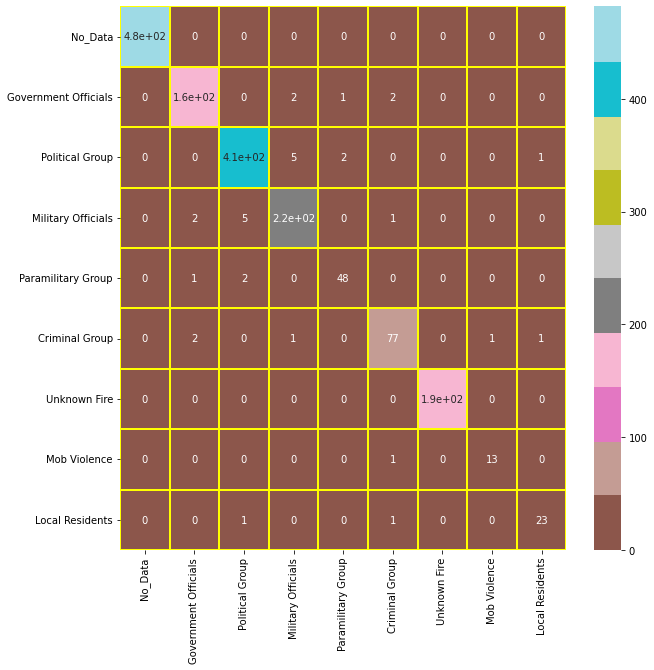

In [41]:
cmap = "tab20"
plt.figure(figsize = (10,10))
linewidths = 2
linecolor = "yellow"
sns.heatmap(data = ARR, cmap = cmap, annot = True, center = 0,xticklabels = Firee,
            linewidths=linewidths,linecolor=linecolor,yticklabels = Firee)
plt.show()

In [42]:
SoF = {}
for kill, source in enumerate(data['Source_of_Fire'].value_counts().index.tolist()):
    SoF[source] = data['Source_of_Fire'].value_counts()[kill]
SoF

{'No_Data': 482,
 'Political Group': 406,
 'Military Officials': 219,
 'Unknown Fire': 191,
 'Government Officials': 165,
 'Criminal Group': 77,
 'Paramilitary Group': 48,
 'Local Residents': 23,
 'Mob Violence': 13,
 'Military Officials, Political Group': 5,
 'Government Officials, Military Officials': 2,
 'Political Group, Paramilitary Group': 2,
 'Criminal Group, Government Officials': 2,
 'Criminal Group, Local Residents': 1,
 'Government Officials, Paramilitary Group': 1,
 'Local Residents, Political Group': 1,
 'Criminal Group, Military Officials': 1,
 'Criminal Group, Mob Violence': 1,
 'Criminal Group, Political Group, Government Officials': 1}

In [43]:
data

,Date,Name,Sex,Country_Killed,Organization,Nationality,Medium,Job,Coverage,Freelance,Local_or_Foreign,Source_of_Fire,Type_of_Death,Impunity,Taken_Captive,Threatened,Tortured,Year
0,1/1/92,Kladoumbaye Maxime,Male,Chad,Agence Tchadienne de Presse,No_Data,No_Data,No_Data,No_Data,No_Data,No_Data,No_Data,No_Data,No_Data,No_Data,No_Data,No_Data,92
1,1/3/92,Ram Singh Biling,Male,India,"Azdi Awaz, Daily Ajit",India,Print,Print Reporter,"Corruption, Human Rights, Politics",Yes,Local,Government Officials,Dangerous Assignment,No_Data,Yes,No,No,92
2,1/15/92,Mustafa Jeha,Male,Lebanon,Al-Amal,Lebanon,Print,Columnist,Politics,No,Local,Political Group,Murder,Yes,No,No,No,92
3,1/17/92,Paul Jenks,Male,Croatia,European Pressphoto Agency,United Kingdom,Print,Photographer,War,Yes,Foreign,Military Officials,Crossfire/Combat-Related,No_Data,No,No,No,92
4,2/9/92,Halit Gungen,Male,Turkey,2000'e Dogru,Turkey,Print,Editor,"Corruption, Human Rights, Politics",No,Local,Government Officials,Murder,Yes,No,No,No,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1636,on an unknown date (death disclosed February 2...,"Fesshaye ""Joshua"" Yohannes",Male,Eritrea,Setit,Eritrea,Print,Editor,Politics,No,Local,Government Officials,Dangerous Assignment,No_Data,Yes,No,No,Unknown
1637,summer 1993,Zikrullo Valiev,No_Data,Tajikistan,Khalqi Ovozi,No_Data,No_Data,No_Data,No_Data,No_Data,No_Data,No_Data,No_Data,No_Data,No_Data,No_Data,No_Data,93
1638,Unknown,Fadel al-Hadidi,Male,Iraq,Mosul al-Youm; Sada al-Iraq,Iraq,Print,"Columnist, Editor, Print Reporter","Corruption, Human Rights, Politics, War",No,Local,Political Group,Murder,Yes,Yes,No,No,Unknown
1639,Unknown,Bilal Ahmed Bilal,Male,Syria,Palestine Today TV,Syria,Television,"Broadcast, Producer","Human Rights, Politics, War",No,Local,Government Officials,Dangerous Assignment,No_Data,No,No,Yes,Unknown


In [44]:
data['Tortured'].unique()

array(['No_Data', 'No', 'Yes', 'na', 'Tortured'], dtype=object)

In [45]:
for index, row in data.iterrows():
    if row['Tortured'] == 'na':
        data.at[index, 'Tortured'] = "No_Data"
    elif row['Tortured'] == 'Tortured':
        data.at[index, "Tortured"] = "No_Data"

## are the tourtured or not

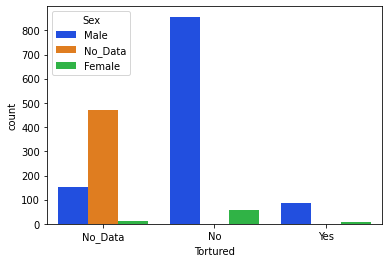

In [46]:
sns.countplot(x = "Tortured", data = data,hue = "Sex", palette = 'bright')
plt.show()

In [47]:
data['Threatened'].unique()

array(['No_Data', 'No', 'Yes', 'No ', ' Yes', 'na', 'Threatened'],
      dtype=object)

In [48]:
for index, row in data.iterrows():
    if row['Threatened'] == 'na':
        data.at[index, 'Threatened'] = "No_Data"
    elif row['Threatened'] == 'Threatened':
        data.at[index, "Threatened"] = "No_Data"
    elif row['Threatened'] == 'No ':
        data.at[index, "Threatened"] = "No"
    elif row['Threatened'] == ' Yes':
        data.at[index, "Threatened"] = "Yes"

## are they threatened or not

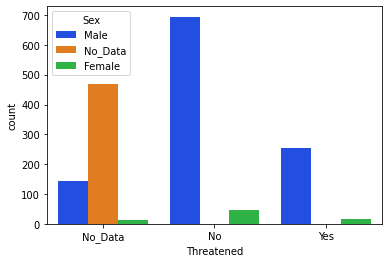

In [49]:
sns.countplot(x = "Threatened", data = data,hue = "Sex", palette = 'bright')
plt.show()

In [50]:
data['Type_of_Death'].unique()

array(['No_Data', 'Dangerous Assignment', 'Murder',
       'Crossfire/Combat-Related', 'Unknown', 'na', 'Crossfire',
       '\nSuspected Source of Fire:', 'Type of Death'], dtype=object)

In [51]:
for index, row in data.iterrows():
    if row['Type_of_Death'] == "na":
        data.at[index, 'Type_of_Death'] = 'No_Data'
    elif row['Type_of_Death'] == "Type of Death":
        data.at[index, 'Type_of_Death'] = 'No_Data'
    elif row['Type_of_Death'] == '\nSuspected Source of Fire:':
        data.at[index, 'Type_of_Death'] = 'Suspected Source of Fire'

## a histogram of type of death

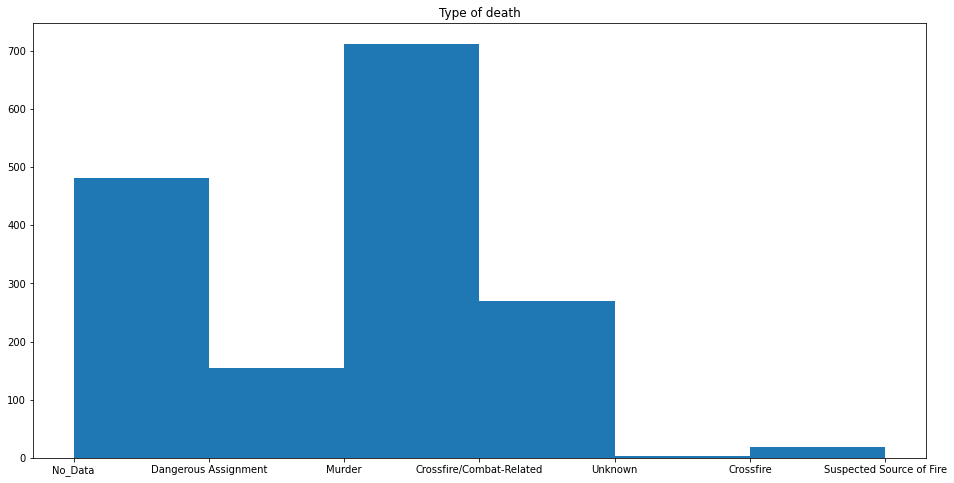

In [52]:
bins = np.array(data['Type_of_Death'].unique())
ax = np.array(data['Type_of_Death'])
plt.figure(figsize= (16,8))
plt.hist(ax, bins)
plt.title("Type of death")
plt.show()

In [53]:
data['Medium'].unique()

array(['No_Data', 'Print', 'Radio', 'Television', 'Print, Television',
       'Radio, Television', 'Print, Radio', 'Internet', 'Print, Internet',
       'Print, Television, Internet', 'Print, Radio, Television',
       'Print, Radio, Internet', 'Television, Internet',
       'Radio, Internet', 'Radio, Television, Internet', 'na',
       'Internet, Television',
       'Photographer, Internet Reporter, Print Reporter', 'Medium'],
      dtype=object)

In [54]:
medium = {}
for kill, med in enumerate(data['Medium'].value_counts().index.tolist()):
    medium[med] = data['Medium'].value_counts()[kill]
medium

{'No_Data': 466,
 'Print': 463,
 'Television': 311,
 'Radio': 141,
 'Internet': 87,
 'Print, Internet': 51,
 'Television, Internet': 30,
 'Radio, Television': 21,
 'Print, Radio': 18,
 'Print, Television': 16,
 'na': 14,
 'Radio, Internet': 8,
 'Internet, Television': 4,
 'Print, Radio, Television': 3,
 'Print, Television, Internet': 2,
 'Print, Radio, Internet': 2,
 'Medium': 2,
 'Radio, Television, Internet': 1,
 'Photographer, Internet Reporter, Print Reporter': 1}

In [55]:
med_kil = ["Print","Television", "Radio","Internet"]
S1 = np.arange(0,4)
S1 = merge(S1, med_kil)
C = list(S1)
med_kill = {}
[med_kill.update({u:v}) for u, v in C]
med_kill

{0: 'Print', 1: 'Television', 2: 'Radio', 3: 'Internet'}

In [56]:
Arr = np.zeros((4,4))
for index, row in data.iterrows():
    if len(row['Medium'].split(',')) == 1:
        for j in med_kill.keys():
            if med_kill[j] == row['Medium']:
                Arr[j][j] += 1
    elif len(row['Medium'].split(',')) == 2:
        for k in med_kill.keys():
            for l in med_kill.keys():
                if k == l:
                    continue
                elif med_kill[k] in row['Medium']:
                    if med_kill[l] in row['Medium']:
                        Arr[k][l] =  Arr[k][l]+ 1

Arr

array([[463.,  16.,  18.,  51.],
       [ 16., 311.,  21.,  34.],
       [ 18.,  21., 141.,   8.],
       [ 51.,  34.,   8.,  87.]])

## the same visualization matrix for medium

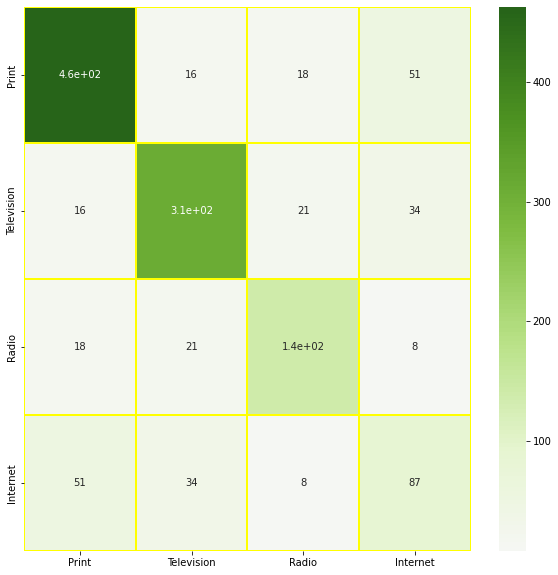

In [57]:
cmap = "PiYG"
plt.figure(figsize = (10,10))
linewidths = 2
linecolor = "yellow"
sns.heatmap(data = Arr, cmap = cmap, annot = True, center = 0,xticklabels = med_kil,
            linewidths=linewidths,linecolor=linecolor,yticklabels = med_kil)
plt.show()

In [58]:
data['Coverage'].unique()
def unique_string(X):
    D = []
    for i in X:
        s = i.split(',')
        for j in s:
            if j[0:1] == " ":
                    j = j[1:]
            if j in D:
                continue
            else :
                D.append(j)
    return D



In [59]:
unique_string(data['Coverage'].unique())

['No_Data',
 'Corruption',
 'Human Rights',
 'Politics',
 'War',
 'Crime',
 'Culture',
 'Business',
 'Sports',
 'na',
 'Coverage']

In [60]:
for index, row in data.iterrows():
    if row['Coverage'] == "na":
        data.at[index, 'Coverage'] = 'No_Data'
    elif row['Coverage'] == 'Coverage':
        data.at[index, 'Coverage'] = 'No_Data'

In [61]:
cov = {}
for kill, cover in enumerate(data['Coverage'].value_counts().index.tolist()):
    cov[cover] = data['Coverage'].value_counts()[kill]
cov

{'No_Data': 518,
 'War': 277,
 'Politics': 169,
 'Politics, War': 93,
 'Human Rights, Politics, War': 53,
 'Corruption': 44,
 'Human Rights, War': 42,
 'Corruption, Crime': 40,
 'Crime': 39,
 'Corruption, Politics': 39,
 'Human Rights, Politics': 37,
 'Human Rights': 34,
 'Culture': 27,
 'Culture, Politics': 25,
 'Culture, Human Rights, Politics': 19,
 'Corruption, Human Rights, Politics': 14,
 'Corruption, Crime, Politics': 12,
 'Culture, Sports': 12,
 'Crime, Politics': 10,
 'Culture, War': 8,
 'Business, Culture, Politics': 7,
 'Sports': 6,
 'Business, Culture': 6,
 'Culture, Politics, War': 6,
 'Business, Corruption, Crime': 5,
 'Culture, Human Rights, Politics, War': 5,
 'Corruption, Human Rights, Politics, War': 5,
 'Corruption, Human Rights': 5,
 'Crime, Human Rights, Politics': 5,
 'Business': 4,
 'Business, Corruption': 4,
 'Business, Corruption, Crime, Culture, Human Rights, Politics, Sports': 4,
 'Corruption, Human Rights, War': 4,
 'War, Human Rights': 3,
 'Business, Corrup

In [62]:
cov_kil = ['Corruption',
 'Human Rights',
 'Politics',
 'War',
 'Crime',
 'Culture',
 'Business',
 'Sports']
S1 = np.arange(0,8)
S1 = merge(S1, cov_kil)
C = list(S1)
cov_kill = {}
[cov_kill.update({u:v}) for u, v in C]
cov_kill


{0: 'Corruption',
 1: 'Human Rights',
 2: 'Politics',
 3: 'War',
 4: 'Crime',
 5: 'Culture',
 6: 'Business',
 7: 'Sports'}

In [63]:
Arr = np.zeros((8,8))
for index, row in data.iterrows():
    if len(row['Coverage'].split(',')) == 1:
        for j in cov_kill.keys():
            if cov_kill[j] == row['Coverage']:
                Arr[j][j] += 1
    elif len(row['Coverage'].split(',')) > 1:
        for k in cov_kill.keys():
            for l in cov_kill.keys():
                if k == l:
                    continue
                elif cov_kill[k] in row['Coverage']:
                    if cov_kill[l] in row['Coverage']:
                        Arr[k][l] =  Arr[k][l]+ 1
                        
Arr

array([[ 44.,  45.,  98.,  24.,  79.,  14.,  26.,   4.],
       [ 45.,  34., 160., 121.,  24.,  38.,  13.,   7.],
       [ 98., 160., 169., 180.,  51.,  86.,  32.,   8.],
       [ 24., 121., 180., 277.,   9.,  32.,   5.,   4.],
       [ 79.,  24.,  51.,   9.,  39.,  13.,  21.,   4.],
       [ 14.,  38.,  86.,  32.,  13.,  27.,  25.,  21.],
       [ 26.,  13.,  32.,   5.,  21.,  25.,   4.,   5.],
       [  4.,   7.,   8.,   4.,   4.,  21.,   5.,   6.]])

## Same visualization matrix for the coverage they used to do

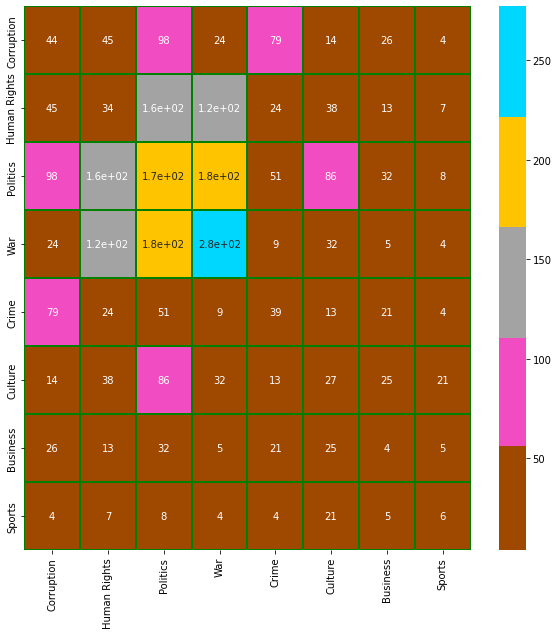

In [64]:
cmap = sns.color_palette("bright")
plt.figure(figsize = (10,10))
linewidths = 2
linecolor = "green"
sns.heatmap(data = Arr, cmap = cmap, annot = True, center = 0,xticklabels = cov_kil,
            linewidths=linewidths,linecolor=linecolor,yticklabels = cov_kil)
plt.show()